In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform_train = transforms.Compose([
    transforms.RandomRotation(10),

    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform_train, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform_test, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(256 * 7 * 7, 128)
        self.dropout2 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout1(x)
        x = x.view(-1, 256 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout2(x)
        x = self.fc2(x)
        return x

model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)
criterion = nn.CrossEntropyLoss()

def train(model, loader, optimizer, criterion, epoch):
    model.train()
    total_loss = 0
    for batch_idx, (data, target) in enumerate(loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch}: Average Loss = {total_loss / len(loader):.4f}")

def test(model, loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            pred = output.argmax(dim=1)
            correct += (pred == target).sum().item()
            total += target.size(0)
    print(f"Test Accuracy: {correct / total * 100:.2f}%")


for epoch in range(1, 11):
    train(model, train_loader, optimizer, criterion, epoch)
    test(model, test_loader)
    scheduler.step()


Epoch 1: Average Loss = 0.4712
Test Accuracy: 98.22%
Epoch 2: Average Loss = 0.2916
Test Accuracy: 98.79%
Epoch 3: Average Loss = 0.2581
Test Accuracy: 98.64%
Epoch 4: Average Loss = 0.2007
Test Accuracy: 99.38%
Epoch 5: Average Loss = 0.1799
Test Accuracy: 99.42%
Epoch 6: Average Loss = 0.1725
Test Accuracy: 99.46%
Epoch 7: Average Loss = 0.1687
Test Accuracy: 99.51%
Epoch 8: Average Loss = 0.1633
Test Accuracy: 99.48%
Epoch 9: Average Loss = 0.1640
Test Accuracy: 99.56%
Epoch 10: Average Loss = 0.1645
Test Accuracy: 99.54%


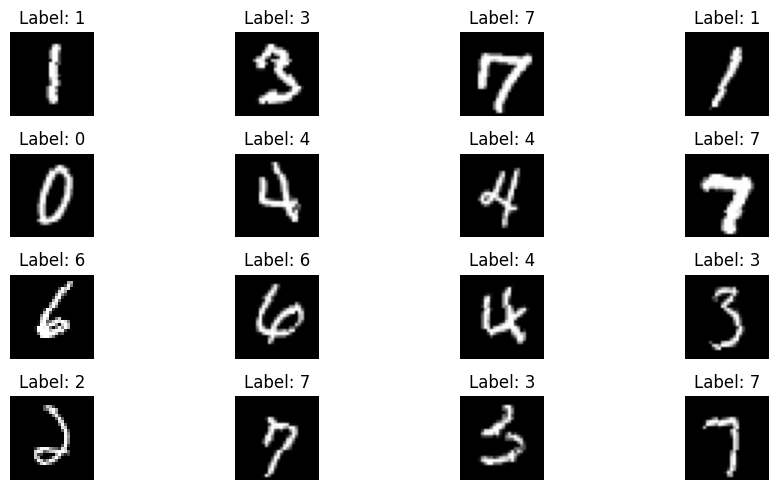

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
data_iter = iter(train_loader)
images, labels = next(data_iter)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(f"Label: {labels[i].item()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

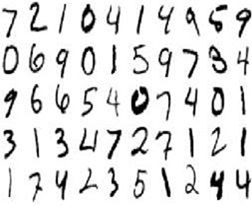

Row 0, Col 0


Row 0, Col 1


Row 0, Col 2


Row 0, Col 3


Row 0, Col 4


Row 0, Col 5


Row 0, Col 6


Row 0, Col 7


Row 0, Col 8


Row 0, Col 9


Row 1, Col 0


Row 1, Col 1


Row 1, Col 2


Row 1, Col 3


Row 1, Col 4


Row 1, Col 5


Row 1, Col 6


Row 1, Col 7


Row 1, Col 8


Row 1, Col 9


Row 2, Col 0


Row 2, Col 1


Row 2, Col 2


Row 2, Col 3


Row 2, Col 4


Row 2, Col 5


Row 2, Col 6


Row 2, Col 7


Row 2, Col 8


Row 2, Col 9


Row 3, Col 0


Row 3, Col 1


Row 3, Col 2


Row 3, Col 3


Row 3, Col 4


Row 3, Col 5


Row 3, Col 6


Row 3, Col 7


Row 3, Col 8


Row 3, Col 9


Row 4, Col 0


Row 4, Col 1


Row 4, Col 2


Row 4, Col 3


Row 4, Col 4


Row 4, Col 5


Row 4, Col 6


Row 4, Col 7


Row 4, Col 8


Row 4, Col 9


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/DIP Lab 7 Material.jpg')
cv2_imshow(img)
img = 255 - img
height, width, _ = img.shape

num_rows = 5
num_cols = 10
cell_height = height // num_rows
cell_width = width // num_cols
testing_cell = []
for row in range(num_rows):
    for col in range(num_cols):
        y1 = row * cell_height
        y2 = (row + 1) * cell_height
        x1 = col * cell_width
        x2 = (col + 1) * cell_width

        cell = img[y1:y2, x1:x2]
        testing_cell.append(cell)
        print(f"Row {row}, Col {col}")
        cv2_imshow(cell)


In [ ]:
from torchvision import transforms
from PIL import Image
import numpy as np

mnist_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Grayscale(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

model.eval()

for idx, cell in enumerate(testing_cell):
    input_tensor = mnist_transform(cell).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(input_tensor)
        pred = output.argmax(dim=1).item()
    print(f"Cell {idx}: Predicted digit = {pred}")
    cv2_imshow(cell)


Cell 0: Predicted digit = 7


Cell 1: Predicted digit = 2


Cell 2: Predicted digit = 1


Cell 3: Predicted digit = 0


Cell 4: Predicted digit = 4


Cell 5: Predicted digit = 1


Cell 6: Predicted digit = 4


Cell 7: Predicted digit = 9


Cell 8: Predicted digit = 5


Cell 9: Predicted digit = 7


Cell 10: Predicted digit = 0


Cell 11: Predicted digit = 6


Cell 12: Predicted digit = 9


Cell 13: Predicted digit = 0


Cell 14: Predicted digit = 1


Cell 15: Predicted digit = 5


Cell 16: Predicted digit = 9


Cell 17: Predicted digit = 7


Cell 18: Predicted digit = 2


Cell 19: Predicted digit = 4


Cell 20: Predicted digit = 9


Cell 21: Predicted digit = 6


Cell 22: Predicted digit = 6


Cell 23: Predicted digit = 5


Cell 24: Predicted digit = 4


Cell 25: Predicted digit = 0


Cell 26: Predicted digit = 7


Cell 27: Predicted digit = 4


Cell 28: Predicted digit = 1


Cell 29: Predicted digit = 7


Cell 30: Predicted digit = 3


Cell 31: Predicted digit = 1


Cell 32: Predicted digit = 3


Cell 33: Predicted digit = 4


Cell 34: Predicted digit = 7


Cell 35: Predicted digit = 2


Cell 36: Predicted digit = 7


Cell 37: Predicted digit = 7


Cell 38: Predicted digit = 2


Cell 39: Predicted digit = 4


Cell 40: Predicted digit = 1


Cell 41: Predicted digit = 7


Cell 42: Predicted digit = 4


Cell 43: Predicted digit = 2


Cell 44: Predicted digit = 3


Cell 45: Predicted digit = 5


Cell 46: Predicted digit = 7


Cell 47: Predicted digit = 2


Cell 48: Predicted digit = 4


Cell 49: Predicted digit = 1
